# Assignment 7

In this assignment,you will design a low pass filter using windowing method. The first step of FIR filter design is to construct the ideal filter response $H_d(e^{j\omega})$ and find the impulse response by taking the inverse Fourier transform of it: $$h_d[n]=\frac{1}{2\pi}\int_{-\pi}^{\pi} H_d(e^{j\omega})e^{j\omega n}d\omega$$

If you take this integral, you will see that $h_d[n]$ is infinitely long and it not causal (meaning that future values are needed to compute the present value). Therefore, to have a practical filter you should shift the impulse response to ensure the causality by adding a phase factor ($e^{j\omega{\frac{M}{2}}}$) and truncate/window the ideal response to a finite length filter.

a) Determine truncated impulse response $h_1[n]$:

$$h_1[n]=\frac{1}{2\pi}\int_{-\pi}^{\pi} H_d(e^{j\omega})e^{j\omega{\frac{M}{2}}}e^{j\omega n}d\omega$$

b) Apply window:
$$h_f[n]=h_1[n]w[n]$$

c) Check the frequency response of the filter, if it does not satisfies the requirements then increase the length of the filter or change the window.

Design a FIR low pass filter where $\omega_c=\pi/5$ using rectangular and Hamming windows, take $M=30$. Remember that:

$$ H_d(e^{j\omega})=   \left\{
\begin{array}{ll}
      1 & |\omega|>\omega_c \\
      0 & otherwise \\
\end{array} 
\right.$$

$$ h_1[n]=   \left\{
\begin{array}{ll}
      \frac{\sin{\omega_c(n-\frac{M}{2})}}{\pi(n-\frac{M}{2})} & 0 \leq n \leq M \\
      0 & otherwise \\
\end{array} 
\right. $$

We can write $\frac{\sin{\omega_c(n-\frac{M}{2})}}{\pi(n-\frac{M}{2})}=\frac{\omega_c}{\pi}sinc(\frac{\omega_c}{\pi}(n-\frac{M}{2})) $.

Plot $h_f[n]$ for both rectangular window and Hamming window. Are they causal? Plot the magnitude of the frequency responses of the filters by taking the Fourier Transform of impulse responses, you can take DFT size $N=1024$ . What are the differences in the resulting filters? Explain. You can plot the frequency responses on the same figure to see the differences easily.

You are not allowed to use FIR filter function of Python (signal.firwin2) in this part, you will do it in the next step.

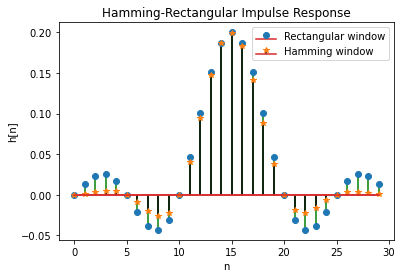

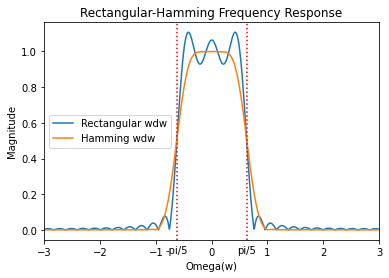

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

# Cut-off frequency
wc = 0.2*np.pi

# Length of the filter (M = 30)
M =30

# Compute truncated impulse response h1[n]
n = np.arange(0, M,1)
h1 = wc/np.pi * np.sinc(wc*(n-M/2)/np.pi)
# Apply rectangular window
w = np.ones(M)
hf_rect = h1 * w

# Apply Hamming window
w = np.hamming(M)
hf_hamm = h1 * w
 
# Plot impulse responses
plt.figure()
plt.stem(n, hf_rect,'g','o')
plt.stem(n, hf_hamm, 'k','*')
plt.title("Hamming-Rectangular Impulse Response")
plt.xlabel('n')
plt.ylabel('h[n]')
plt.legend(['Rectangular window', 'Hamming window'])

# Compute frequency responses
Hf_rect = np.fft.fft(hf_rect, 1024)
Hf_hamm = np.fft.fft(hf_hamm, 1024)
Hf_rect=np.fft.fftshift(Hf_rect)
Hf_hamm=np.fft.fftshift(Hf_hamm)

# Fix fval array to show wc=pi/5
fval = np.linspace(-np.pi,np.pi, 1024)

# Plot magnitude of frequency responses
plt.figure()
plt.plot(fval,np.abs(Hf_rect))
plt.plot(fval,np.abs(Hf_hamm))
plt.title("Rectangular-Hamming Frequency Response")
plt.xlabel('Omega(w)')
plt.ylabel('Magnitude')
plt.legend(['Rectangular wdw', 'Hamming wdw'],loc=6)
plt.xlim([-3, 3])
plt.axvline(-np.pi/5, color='r', linestyle=':')
plt.axvline(np.pi/5, color='r', linestyle=':')
plt.text(-np.pi/5, -0.14, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -0.14, 'pi/5', ha='center', va='bottom')
plt.show()


**Explanation:**
It has been seen that the transition region is shorter in the rectangular window, but the ripples are quite high for rectangular window, considering these two situations, both can be used in different applications.It has also been observed that when the number of M is increased, only the transition region shortens and there is no change in the total sidelobe area.

Now, use signal.firwin2(M,omega_vec/pi,gain_vec,window='hamming') function to design a similar filter in the previous part (a low pass filter with cut-off frequency $\pi/5$). Consider Boxcar, Hamming, Blackman and Bartlett windows. 

Plot the impulse responses and magnitude of the frequency responses of the filters. To see the sidelobes better, in another figure plot the magnitude responses of all filters in dB scale (Remember $A_{dB}=20log{|A|}$) and set y axes between 10 dB to -60 dB in order to compare the spectrums better (use plt.ylim() function). Explain the differences of the filters caused by the windows. What are the advantages and disadvantages of these filters?

You can read https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin2.html#scipy.signal.firwin2 for more information about signal.firwin2 function.

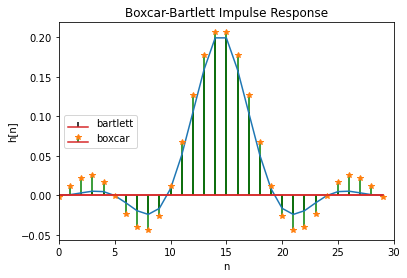

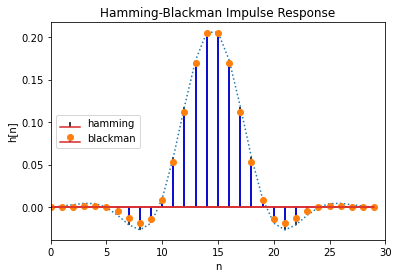

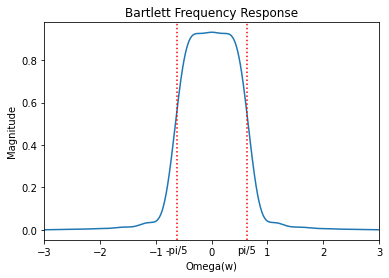

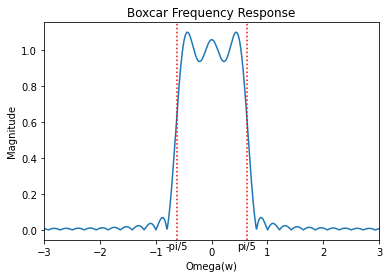

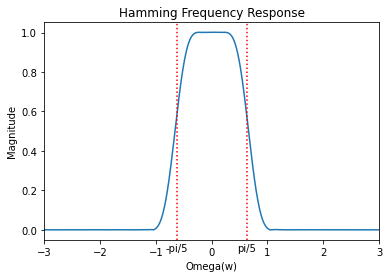

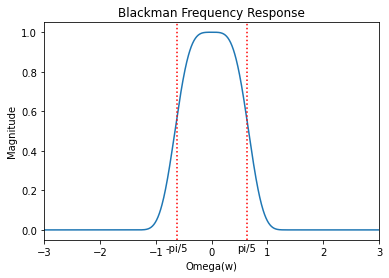

In [2]:
#write your code here
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

M = 30
omega_vec = np.linspace(0, np.pi, 32)
w = np.linspace(0, np.pi, 32)
w_vec = np.where((w >= 0) & (w <= np.pi/5), 1, 0)

bartlett = signal.firwin2(M, omega_vec/np.pi, w_vec, window='bartlett')
boxcar = signal.firwin2(M, omega_vec/np.pi, w_vec, window='boxcar')
hamming = signal.firwin2(M, omega_vec/np.pi, w_vec, window='hamming')
blackman = signal.firwin2(M, omega_vec/np.pi, w_vec, window='blackman')

Hf_bartlett = np.fft.fft(bartlett, 1024)
Hf_bartlett=np.fft.fftshift(Hf_bartlett)
Hf_bartlett_db=20 *np.log10(np.abs(Hf_bartlett + 1e-18)) #1e-18 to avoid zero division

Hf_boxcar = np.fft.fft(boxcar, 1024)
Hf_boxcar=np.fft.fftshift(Hf_boxcar)
Hf_boxcar_db=20*np.log10(np.abs(Hf_boxcar) + 1e-18) 


Hf_hamming = np.fft.fft(hamming, 1024)
Hf_hamming=np.fft.fftshift(Hf_hamming)
Hf_hamming_db=20 *np.log10(np.abs(Hf_hamming + 1e-18))


Hf_blackman = np.fft.fft(blackman, 1024)
Hf_blackman=np.fft.fftshift(Hf_blackman)
Hf_blackman_db=20 *np.log10(np.abs(Hf_blackman + 1e-18))


impulse_rspn_bartlett = bartlett
impulse_rspn_boxcar = boxcar
impulse_rspn_hamming = hamming
impulse_rspn_blackman =blackman


x = np.arange(len(impulse_rspn_bartlett))

# Plot the impulse responses
plt.figure()
plt.stem(x, impulse_rspn_bartlett, 'k', '-')
plt.stem(x, impulse_rspn_boxcar, 'g', '*')
plt.title("Boxcar-Bartlett Impulse Response")
plt.xlabel('n')
plt.ylabel('h[n]')
plt.xlim([0, 30])
plt.legend(['bartlett', 'boxcar'], loc=6)
plt.show()
plt.figure()
plt.title("Hamming-Blackman Impulse Response")
plt.stem(x, impulse_rspn_hamming, 'k', ':')
plt.stem(x, impulse_rspn_blackman, 'b', 'o')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.xlim([0, 30])
plt.legend(['hamming', 'blackman'], loc=6)
plt.show()

# Fix fval array to show wc=pi/5
fval = np.linspace(-np.pi,np.pi, 1024)

# Plot magnitude of frequency responses
plt.figure()
plt.plot(fval,np.abs(Hf_bartlett))
plt.title("Bartlett Frequency Response")
plt.xlabel('Omega(w)')
plt.ylabel('Magnitude')
plt.xlim([-3, 3])
plt.axvline(-np.pi/5, color='r', linestyle=':')
plt.axvline(np.pi/5, color='r', linestyle=':')
plt.text(-np.pi/5, -0.12, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -0.12, 'pi/5', ha='center', va='bottom')


plt.figure()
plt.plot(fval,np.abs(Hf_boxcar))
plt.title("Boxcar Frequency Response")
plt.xlabel('Omega(w)')
plt.ylabel('Magnitude')
plt.xlim([-3, 3])
plt.axvline(-np.pi/5, color='r', linestyle=':')
plt.axvline(np.pi/5, color='r', linestyle=':')
plt.text(-np.pi/5, -0.12, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -0.12, 'pi/5', ha='center', va='bottom')


plt.figure()
plt.plot(fval,np.abs(Hf_hamming))
plt.title("Hamming Frequency Response")
plt.xlabel('Omega(w)')
plt.ylabel('Magnitude')
plt.xlim([-3, 3])
plt.axvline(-np.pi/5, color='r', linestyle=':')
plt.axvline(np.pi/5, color='r', linestyle=':')
plt.text(-np.pi/5, -0.12, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -0.12, 'pi/5', ha='center', va='bottom')

plt.figure()
plt.plot(fval,np.abs(Hf_blackman))
plt.title("Blackman Frequency Response")
plt.xlabel('Omega(w)')
plt.ylabel('Magnitude')
plt.xlim([-3, 3])
plt.axvline(-np.pi/5, color='r', linestyle=':')
plt.axvline(np.pi/5, color='r', linestyle=':')
plt.text(-np.pi/5, -0.12, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -0.12, 'pi/5', ha='center', va='bottom')

plt.show()



**Explanation:**
First of all, omega and gain vectors were determined to do this work. For a more accurate application, the length of the vectors should be at least 32 and there is no upper limit.

Although there are no big differences in the impulse response graphics when the windows are applied one by one, the differences in the frequency domain are quite much.

**Bartlett:**
It was observed that the attenuation factor was better than the boxcar, but the sidelobes were not completely zeroised. It was observed that the transition zone was narrower than the blackman but wider than the boxcar.

**Boxcar:**
It has been observed that it is the most advantageous as a transition region, but it is quite weak in terms of sidelobes.

**Hamming:**
It is very similar to bartlett as a transition zone and to blackman as side lobe attenuation. It is one of the most used window
methods among LPFs.

**Blackman:**
As a sidelobe it is the best in the range. However, it wider than others in the transition zone.

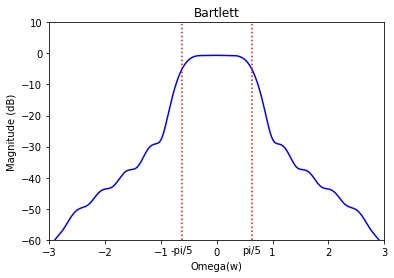

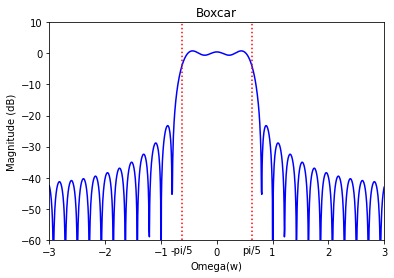

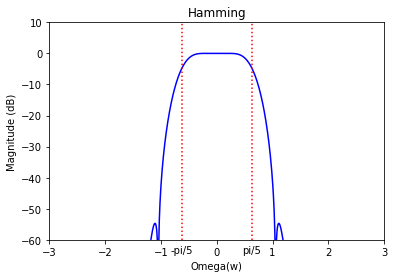

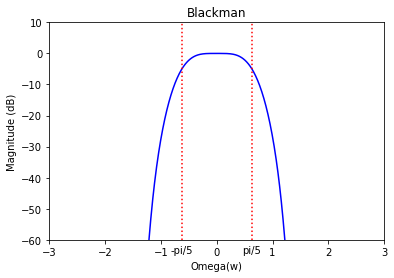

In [4]:
plt.figure()
plt.plot(fval, Hf_bartlett_db,'b')
plt.title("Bartlett")
plt.xlabel('Omega(w)')
plt.ylabel('Magnitude (dB)')
plt.xlim([-3, 3])
plt.ylim([-60, 10])
plt.axvline(-np.pi/5, color='r', linestyle=':')
plt.axvline(np.pi/5, color='r', linestyle=':')
plt.text(-np.pi/5, -65, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -65, 'pi/5', ha='center', va='bottom')

plt.figure()
plt.plot(fval, Hf_boxcar_db,'b')
plt.title("Boxcar")
plt.xlabel('Omega(w)')
plt.ylabel('Magnitude (dB)')
plt.xlim([-3, 3])
plt.ylim([-60, 10])
plt.axvline(-np.pi/5, color='r', linestyle=':')
plt.axvline(np.pi/5, color='r', linestyle=':')
plt.text(-np.pi/5, -65, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -65, 'pi/5', ha='center', va='bottom')

plt.figure()
plt.plot(fval, Hf_hamming_db,'b')
plt.title("Hamming")
plt.xlabel('Omega(w)')
plt.ylabel('Magnitude (dB)')
plt.xlim([-3, 3])
plt.ylim([-60, 10])
plt.axvline(-np.pi/5, color='r', linestyle=':')
plt.axvline(np.pi/5, color='r', linestyle=':')
plt.text(-np.pi/5, -65, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -65, 'pi/5', ha='center', va='bottom')

plt.figure()
plt.plot(fval, Hf_blackman_db,'b')
plt.title("Blackman")
plt.xlabel('Omega(w)')
plt.ylabel('Magnitude (dB)')
plt.xlim([-3, 3])
plt.ylim([-60, 10])
plt.axvline(-np.pi/5, color='r', linestyle=':')
plt.axvline(np.pi/5, color='r', linestyle=':')
plt.text(-np.pi/5, -65, '-pi/5', ha='center', va='bottom')
plt.text(+np.pi/5, -65, 'pi/5', ha='center', va='bottom')
plt.show()

The db scale representations of the signals also given here, where the differences between them in terms of attenuation factors and transition areas can be seen better.